### Exercise 1

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data = load_iris()
X = data.data
y = data.target

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[ 0, 50,  0,  0],
       [23,  0, 27,  0],
       [17,  0,  1, 32],
       [ 0,  0,  0,  0]])

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
confusion_matrix(y,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

In [9]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
confusion_matrix(y,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0, 50,  0],
       [47,  3,  0],
       [50,  0,  0]])

In [6]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
confusion_matrix(y,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0, 50,  0,  0,  0],
       [ 0,  0, 26, 24,  0],
       [24,  0,  1, 13, 12],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

### Exercise 2

Use the elbow method, the silhouette method, and the Davies-Bouldin method to evaluate your clustering result.  Do the data-driven methods provide clear guidance?

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

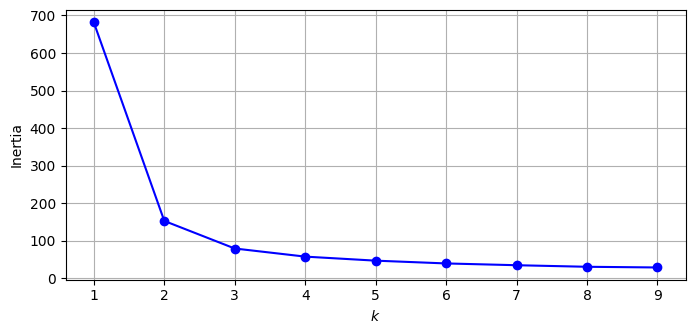

In [8]:
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

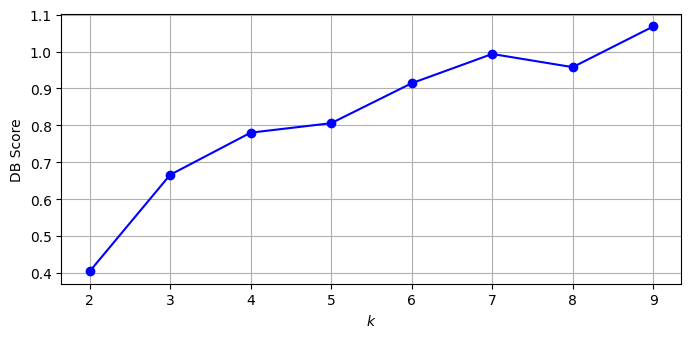

In [11]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K = range(2, 10)  # Davies-Bouldin is undefined for n_clusters=1
for k in K:
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), db_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("DB Score")
plt.grid()
plt.show()

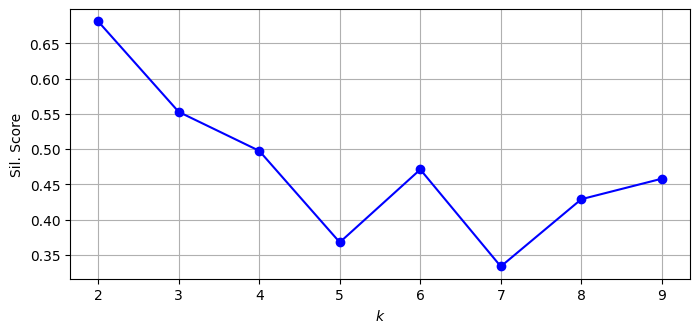

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)  # silhouette_score requires at least 2 clusters
for k in K:
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Sil. Score")
plt.grid()
plt.show()

### Exercise 3

In the following example, MeanShift, SpectralClustering, DBScan and HDBScan to fit the data. For each clustering method, can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

In [14]:
%pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.5 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3675149 sha256=a978e434ce5866617f6509674976dcb2fb769a2d7de79274ebcbf2534bfbc660
  Stored in directory: /home/codespace/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

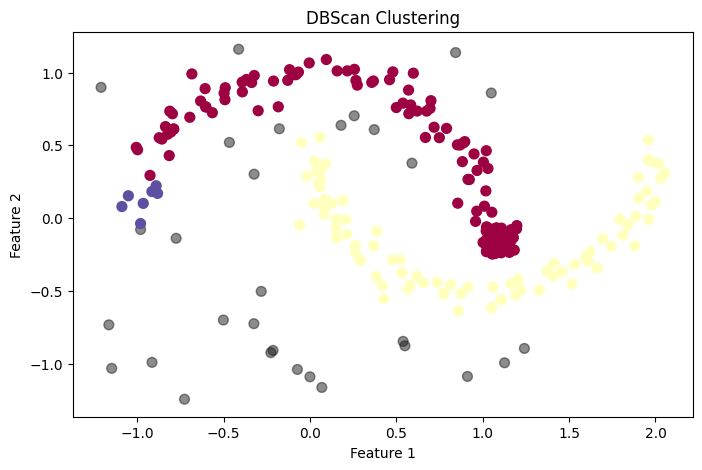

In [8]:
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.18, min_samples=6).fit_predict(data)
plt.figure(figsize=(8,5))

unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels) - 1))

# Map each label to a color, with a special case for noise (-1)
color_map = {label: colors[i] for i, label in enumerate(unique_labels) if label != -1}

color_map[-1] = (0.1, 0.1, 0.1, 0.5)  # Gray with 50% alpha for noise points

# Assign colors to each data point based on their label
point_colors = np.array([color_map[label] for label in dbscan_labels])

plt.scatter(data[:, 0], data[:, 1],   color=point_colors, s=50)
plt.title('DBScan Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [43]:
dbscan_labels

array([ 0,  1,  2,  3, -1,  4,  4,  2,  5,  1,  6,  1,  7,  7,  4,  3, -1,
        9,  4,  2,  1,  2,  4,  1,  0,  4,  2,  1, -1,  6,  1,  7, -1,  0,
        0,  7,  3,  7, -1,  4,  0,  8,  3,  2,  4,  9,  9,  1,  0,  3,  0,
        6,  9,  0, 10, -1,  7,  7,  2,  0,  0,  0, -1,  8,  1,  6,  8,  2,
        0,  6,  1,  0,  4,  1,  8,  2,  2,  4,  1,  7,  4,  0,  6,  3,  8,
        1,  0, 10,  3,  4,  2,  3,  0,  7,  0,  4,  7,  1, -1,  8,  4, -1,
       10, -1,  0,  4,  0,  2,  4,  0,  4,  1, -1,  2,  0,  4,  4,  4, -1,
       10, -1,  4,  7,  4,  1,  6,  8, 10,  4,  4,  7,  6, 10,  0,  3,  4,
        0,  8,  4,  8, -1,  6,  4,  0,  8,  1,  6,  8, 10,  2,  4, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1, -1, -1,  2,  2,
       -1, -1,  4, -1, -1,  3,  3, -1, -1, -1, -1,  0, -1,  4, -1,  9, -1,
        8, -1, 10, -1,  4,  4,  2, -1, -1, -1, -1, -1,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

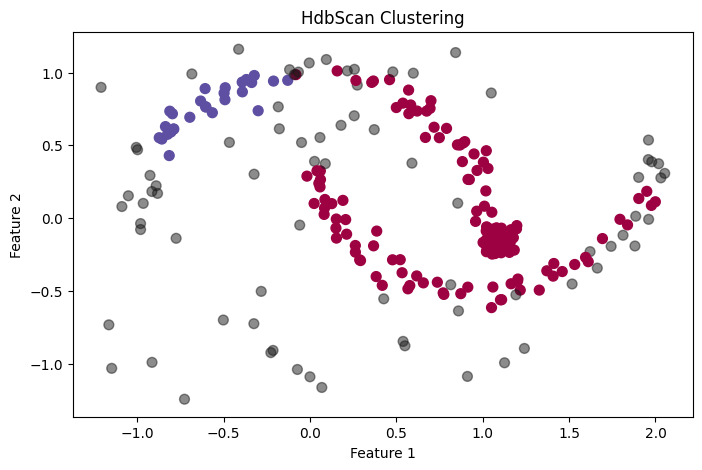

In [9]:

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=8,cluster_selection_epsilon=10).fit_predict(data)
unique_labels = set(hdbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels) - 1))

# Map each label to a color, with a special case for noise (-1)
color_map = {label: colors[i] for i, label in enumerate(unique_labels) if label != -1}

color_map[-1] = (0.1, 0.1, 0.1, 0.5)  # Gray with 50% alpha for noise points

# Assign colors to each data point based on their label
point_colors = np.array([color_map[label] for label in hdbscan_labels])

plt.figure(figsize=(8,5))
plt.scatter(data[:, 0], data[:, 1],   color=point_colors, s=50)
plt.title('HdbScan Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

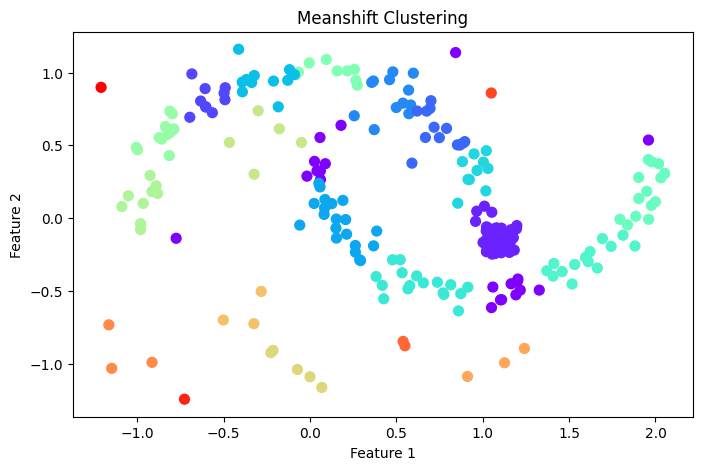

In [12]:

# Meanshift clustering
ms_labels = MeanShift(bandwidth=.3,cluster_all=False).fit_predict(data)
plt.figure(figsize=(8,5))
plt.scatter(data[:, 0], data[:, 1], c=ms_labels, cmap='rainbow', s=50)
plt.title('Meanshift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

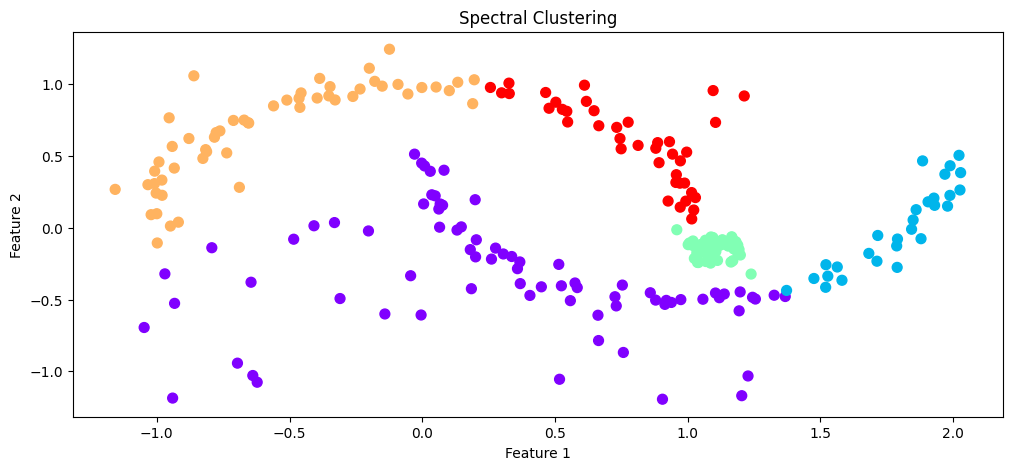

In [112]:

# Spectral clustering
spectral_labels = SpectralClustering(n_clusters=5, affinity='nearest_neighbors').fit_predict(data)
plt.figure(figsize=(12,5))
plt.scatter(data[:, 0], data[:, 1], c=spectral_labels, cmap='rainbow', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercise 4

The following plot contains five clusters.  See if you can set the parameters of GMM to identify all clusters.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


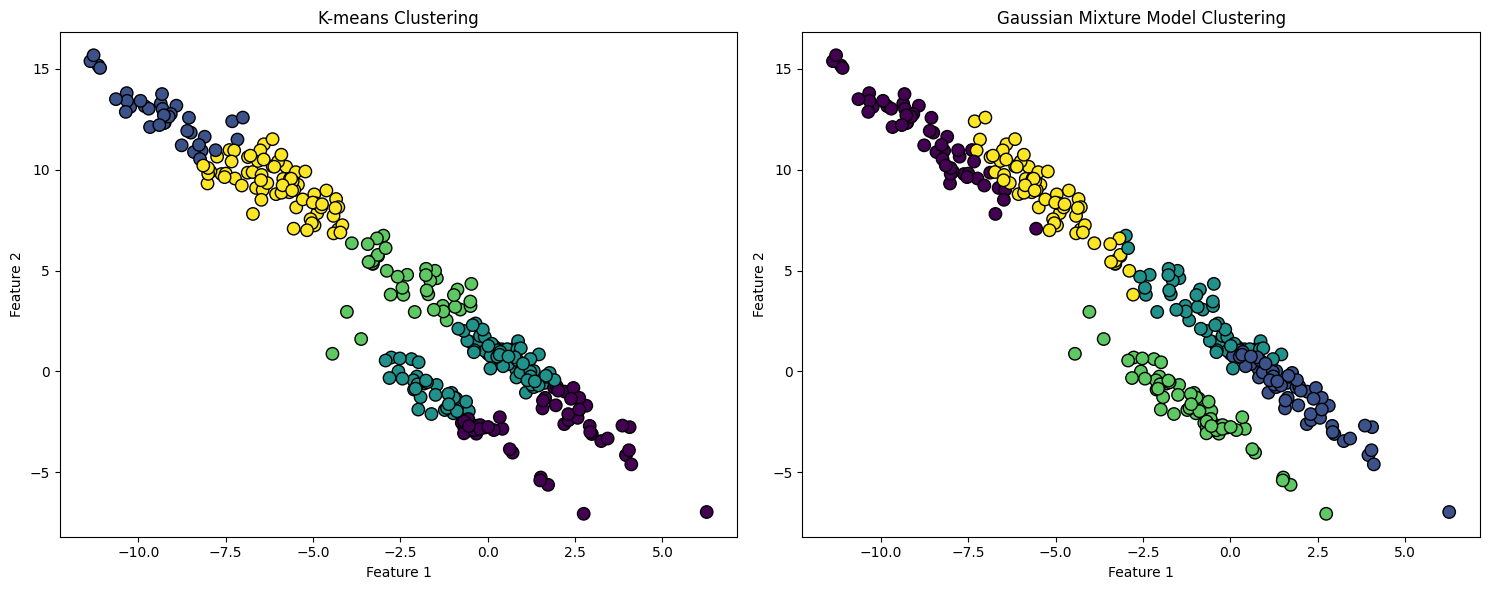

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
